In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

Check the GPU

In [4]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [3]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

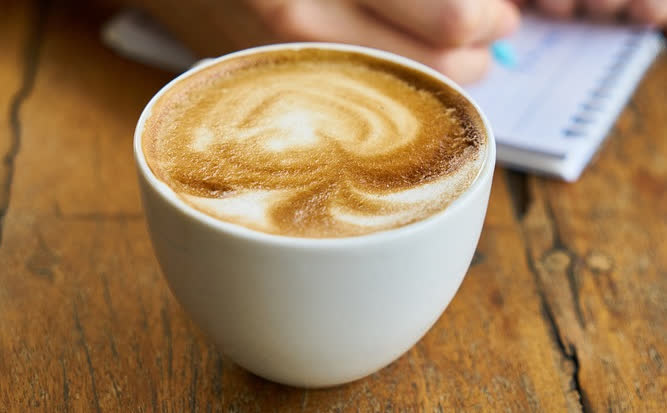

In [4]:
from IPython.display import Image
Image(filename='data/MobileNet-samples/2.jpg', width=300,height=200)

In [5]:
preprocessed_image = prepare_image('2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)    # top five
results

[[('n07920052', 'espresso', 0.9766624),
  ('n07930864', 'cup', 0.010093509),
  ('n07932039', 'eggnog', 0.0085970545),
  ('n03063599', 'coffee_mug', 0.0036651813),
  ('n04597913', 'wooden_spoon', 0.0004963667)]]

In [6]:
print(results[0][0])
print(results[0][0][0])
print(results[0][0][1])
print(results[0][0][2])

('n07920052', 'espresso', 0.9766624)
n07920052
espresso
0.9766624
